In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import scale 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, pairwise_distances
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns
import seaborn as sb
import statsmodels.api as sm
from pandas.plotting import parallel_coordinates
%matplotlib inline
import missingno as msno
import re
import plotly.express as px
import seaborn as sns
pd.set_option("display.max_colwidth",500)
pd.set_option("display.max_rows",500)
from pandasql import sqldf
psql = lambda q: sqldf(q, globals())
import warnings
warnings.simplefilter("ignore")


In [164]:
# Creating data frame

df = pd.read_csv("bank-full.csv")

In [165]:
df = pd.read_csv("bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [166]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [168]:
# Changing 'y' (target variable) into binary. (1 for yes and 0 for no)

df['y'] = np.where(df['y']=='yes',1,0).astype('int64')
counts_y = df['y'].value_counts()
print(counts_y)

y
0    39922
1     5289
Name: count, dtype: int64


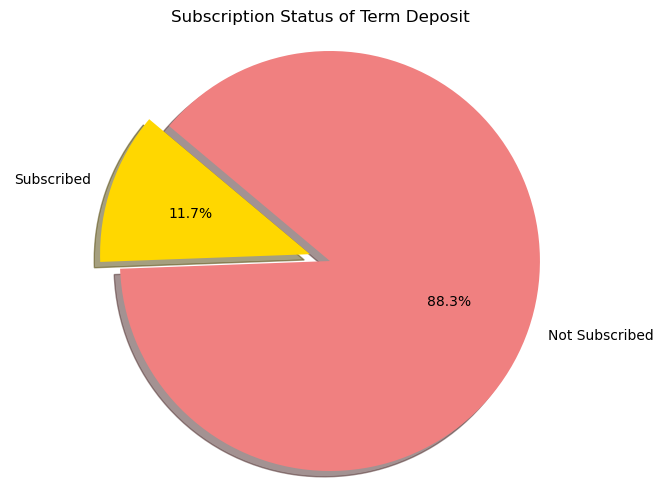

In [169]:
import matplotlib.pyplot as plt

# Counts of subscribers and non-subscribers
not_subscribed_count = 39922
subscribed_count = 5289

# Calculate percentages
total_count = subscribed_count + not_subscribed_count
subscribed_percentage = (subscribed_count / total_count) * 100
not_subscribed_percentage = (not_subscribed_count / total_count) * 100

# Data to plot
labels = 'Subscribed', 'Not Subscribed'
sizes = [subscribed_percentage, not_subscribed_percentage]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice (Subscribed)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Subscription Status of Term Deposit')
plt.show()

# In our data there are total term deposit subscription as 5289 and those who have not subscribed are 39922. 

# In order to increase the subscription of Term deposit so that Bank can earn the profit we are diving into the data and suggest meaningful steps to increase the subcription.

###  Prepossing of data
#Finding the duplicates: duplicates are not found in the data
#negative pdays values are removed :   value of -1 indicates that the customer hasn’t been contacted since the previous campaign. Pdays is the number of days that passed by after the customer was last contacted from a previous campaign.indicated that the customer has never been contacted since the previous campaign while positive value indicates how much time the customer is contacted. Dat is changed  as data  '1' if customer is contacted and to '0' if customer is not contacted  
#unknown Job: Job is not known, Job: for 30 are found unknown for category 1, we removed the people with unknown job.
#Unknown in Contact and p: The contact data 456 for catgory 1 and 10213 for category 0,mode of contact is not known,its not advisable to remove so we have put it into other category.
#poutcome are changed to other as the poutcome is the outcome of previous campaign it can be sucess, failure or outcome not known so we have moved all other to unknown values,these are 1321 and 281 for Category 0 and 1  respectively.
#we dont find any missing values.


In [170]:
# Check target label split over categorical features 
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]

for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y  job          
0  admin.           4540
   blue-collar      9024
   entrepreneur     1364
   housemaid        1131
   management       8157
   retired          1748
   self-employed    1392
   services         3785
   student           669
   technician       6757
   unemployed       1101
   unknown           254
1  admin.            631
   blue-collar       708
   entrepreneur      123
   housemaid         109
   management       1301
   retired           516
   self-employed     187
   services          369
   student           269
   technician        840
   unemployed        202
   unknown            34
dtype: int64
y  marital 
0  divorced     4585
   married     24459
   single      10878
1  divorced      622
   married      2755
   single       1912
dtype: int64
y  education
0  primary       6260
   secondary    20752
   tertiary     11305
   unknown       1605
1  primary        591
   secondary     2450
   tertiary      1996
   unknown        252
dtype: int64
y  default
0  no 

In [171]:
# Checking for duplicates in our data

df.duplicated().sum()

0

In [172]:
# Fixing pdays column in the data frame

if 'pdays' in df.columns:
    
    # Replace values in 'pdays' column

    df['pdays'] = np.where(df['pdays'] < 0, 0, 1)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,0


In [173]:
# Removing any customer with 'unknown' job

df = df[~df['job'].isin(['unknown'])].reset_index(drop=True)

In [174]:
# Replace 'unknown' with 'other' in contact

df['contact'].replace(['unknown'], ['other'], inplace=True)

In [175]:
# Replace 'other' with 'unknown' in poutcome

df['poutcome'].replace(['other'], ['unknown'], inplace=True)

In [176]:
# Identifying data with missing values

missing_values = df.isna().sum()
print("Missing values count per column:")
print(missing_values)

Missing values count per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [177]:
import pandas as pd

# Remove rows where 'balance' ,column is negative
df = df[df['balance']>0]

## Categorical data Analysis

In [178]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [179]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 11
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 3


There are 9 categorical features

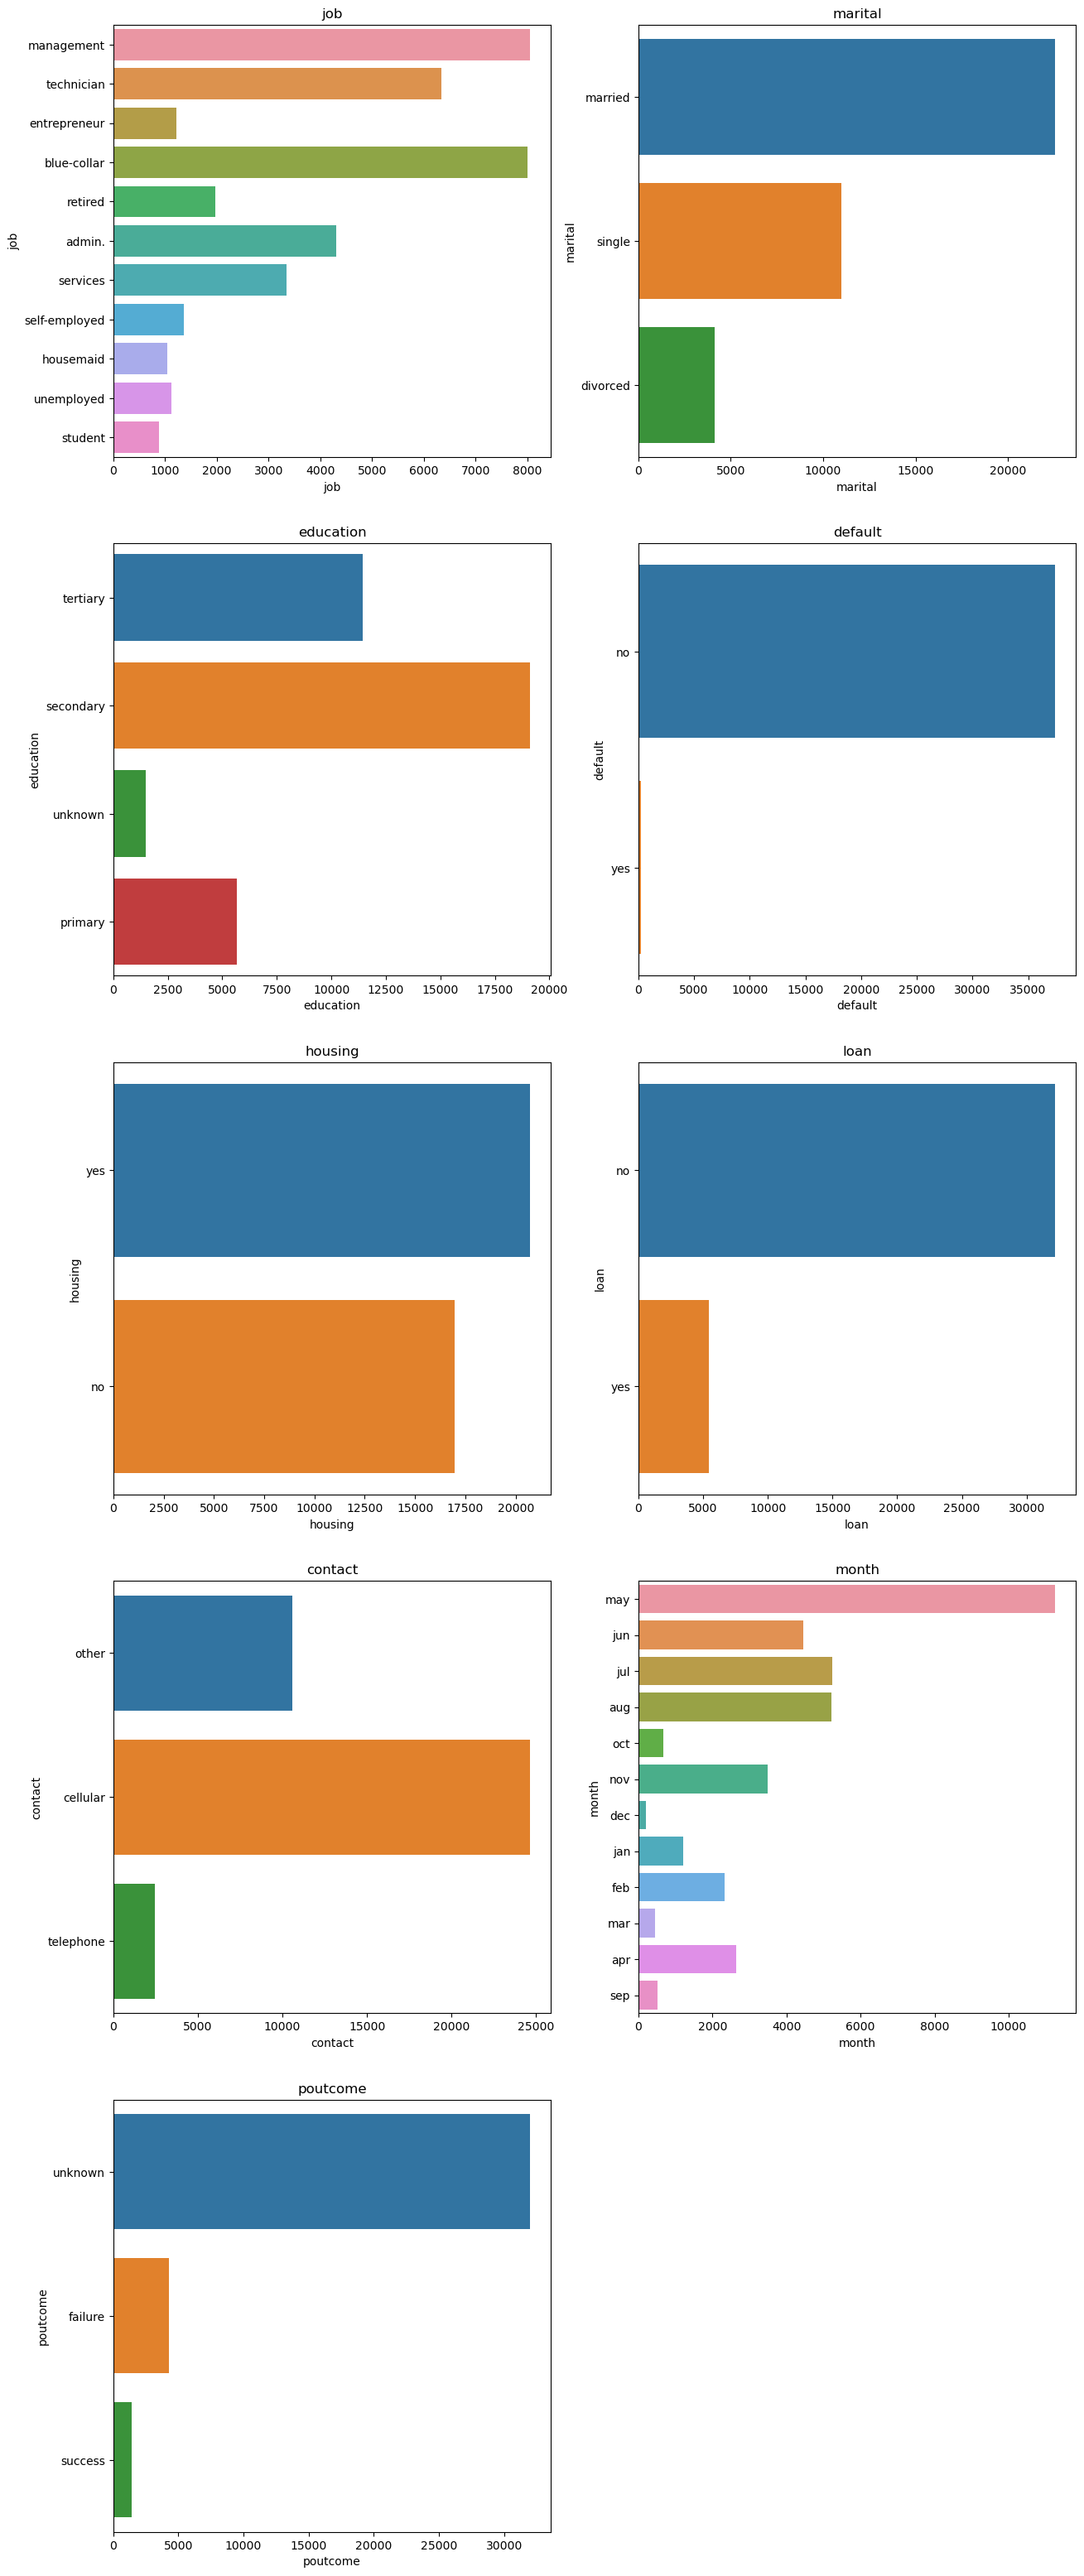

In [181]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(10,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()



1. Client with job type as 'management' are highest in our dataset and 'student' are the least.
2. Majority of the clients in our dataset are 'married' where as 'divorced' are the least.
3. Client with education background as 'secondary' are in high numbers in our dataset.
4. Data in month of may is highest and is least in december.




In [19]:
# Check target label split over categorical features 
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y  job          
0  admin.           3747
   blue-collar      7388
   entrepreneur     1122
   housemaid         950
   management       6843
   retired          1495
   self-employed    1197
   services         3042
   student           622
   technician       5577
   unemployed        935
1  admin.            565
   blue-collar       618
   entrepreneur       98
   housemaid          99
   management       1210
   retired           482
   self-employed     170
   services          313
   student           258
   technician        757
   unemployed        187
dtype: int64
y  marital 
0  divorced     3621
   married     20078
   single       9219
1  divorced      530
   married      2474
   single       1753
dtype: int64
y  education
0  primary       5133
   secondary    16929
   tertiary      9601
   unknown       1255
1  primary        528
   secondary     2180
   tertiary      1822
   unknown        227
dtype: int64
y  default
0  no         32677
   yes          241
1  no          4

# Numericla value features Data Analysis

In [20]:
# Changing 'education' into numerical value.

df['education'] = np.where(df['education'] == 'primary', 1,
                  np.where(df['education'] == 'secondary', 2,
                  np.where(df['education'] == 'tertiary', 3, 0)))

In [21]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# Visualise the numerical variables

df[numerical_features].head()

Number of numerical variables:  8


,age,education,balance,day,duration,campaign,pdays,previous
0,58,3,2143,5,261,1,0,0
1,44,2,29,5,151,1,0,0
2,33,2,2,5,76,1,0,0
3,47,0,1506,5,92,1,0,0
4,35,3,231,5,139,1,0,0


In [22]:
# List of discrete features

discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
print("Discrete Variables Count: {}".format(len(discrete_features)))
discrete_features

Discrete Variables Count: 2


['education', 'pdays']

In [23]:
# List of continuous features

continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))
continuous_features

Continuous feature Count 6


['age', 'balance', 'day', 'duration', 'campaign', 'previous']

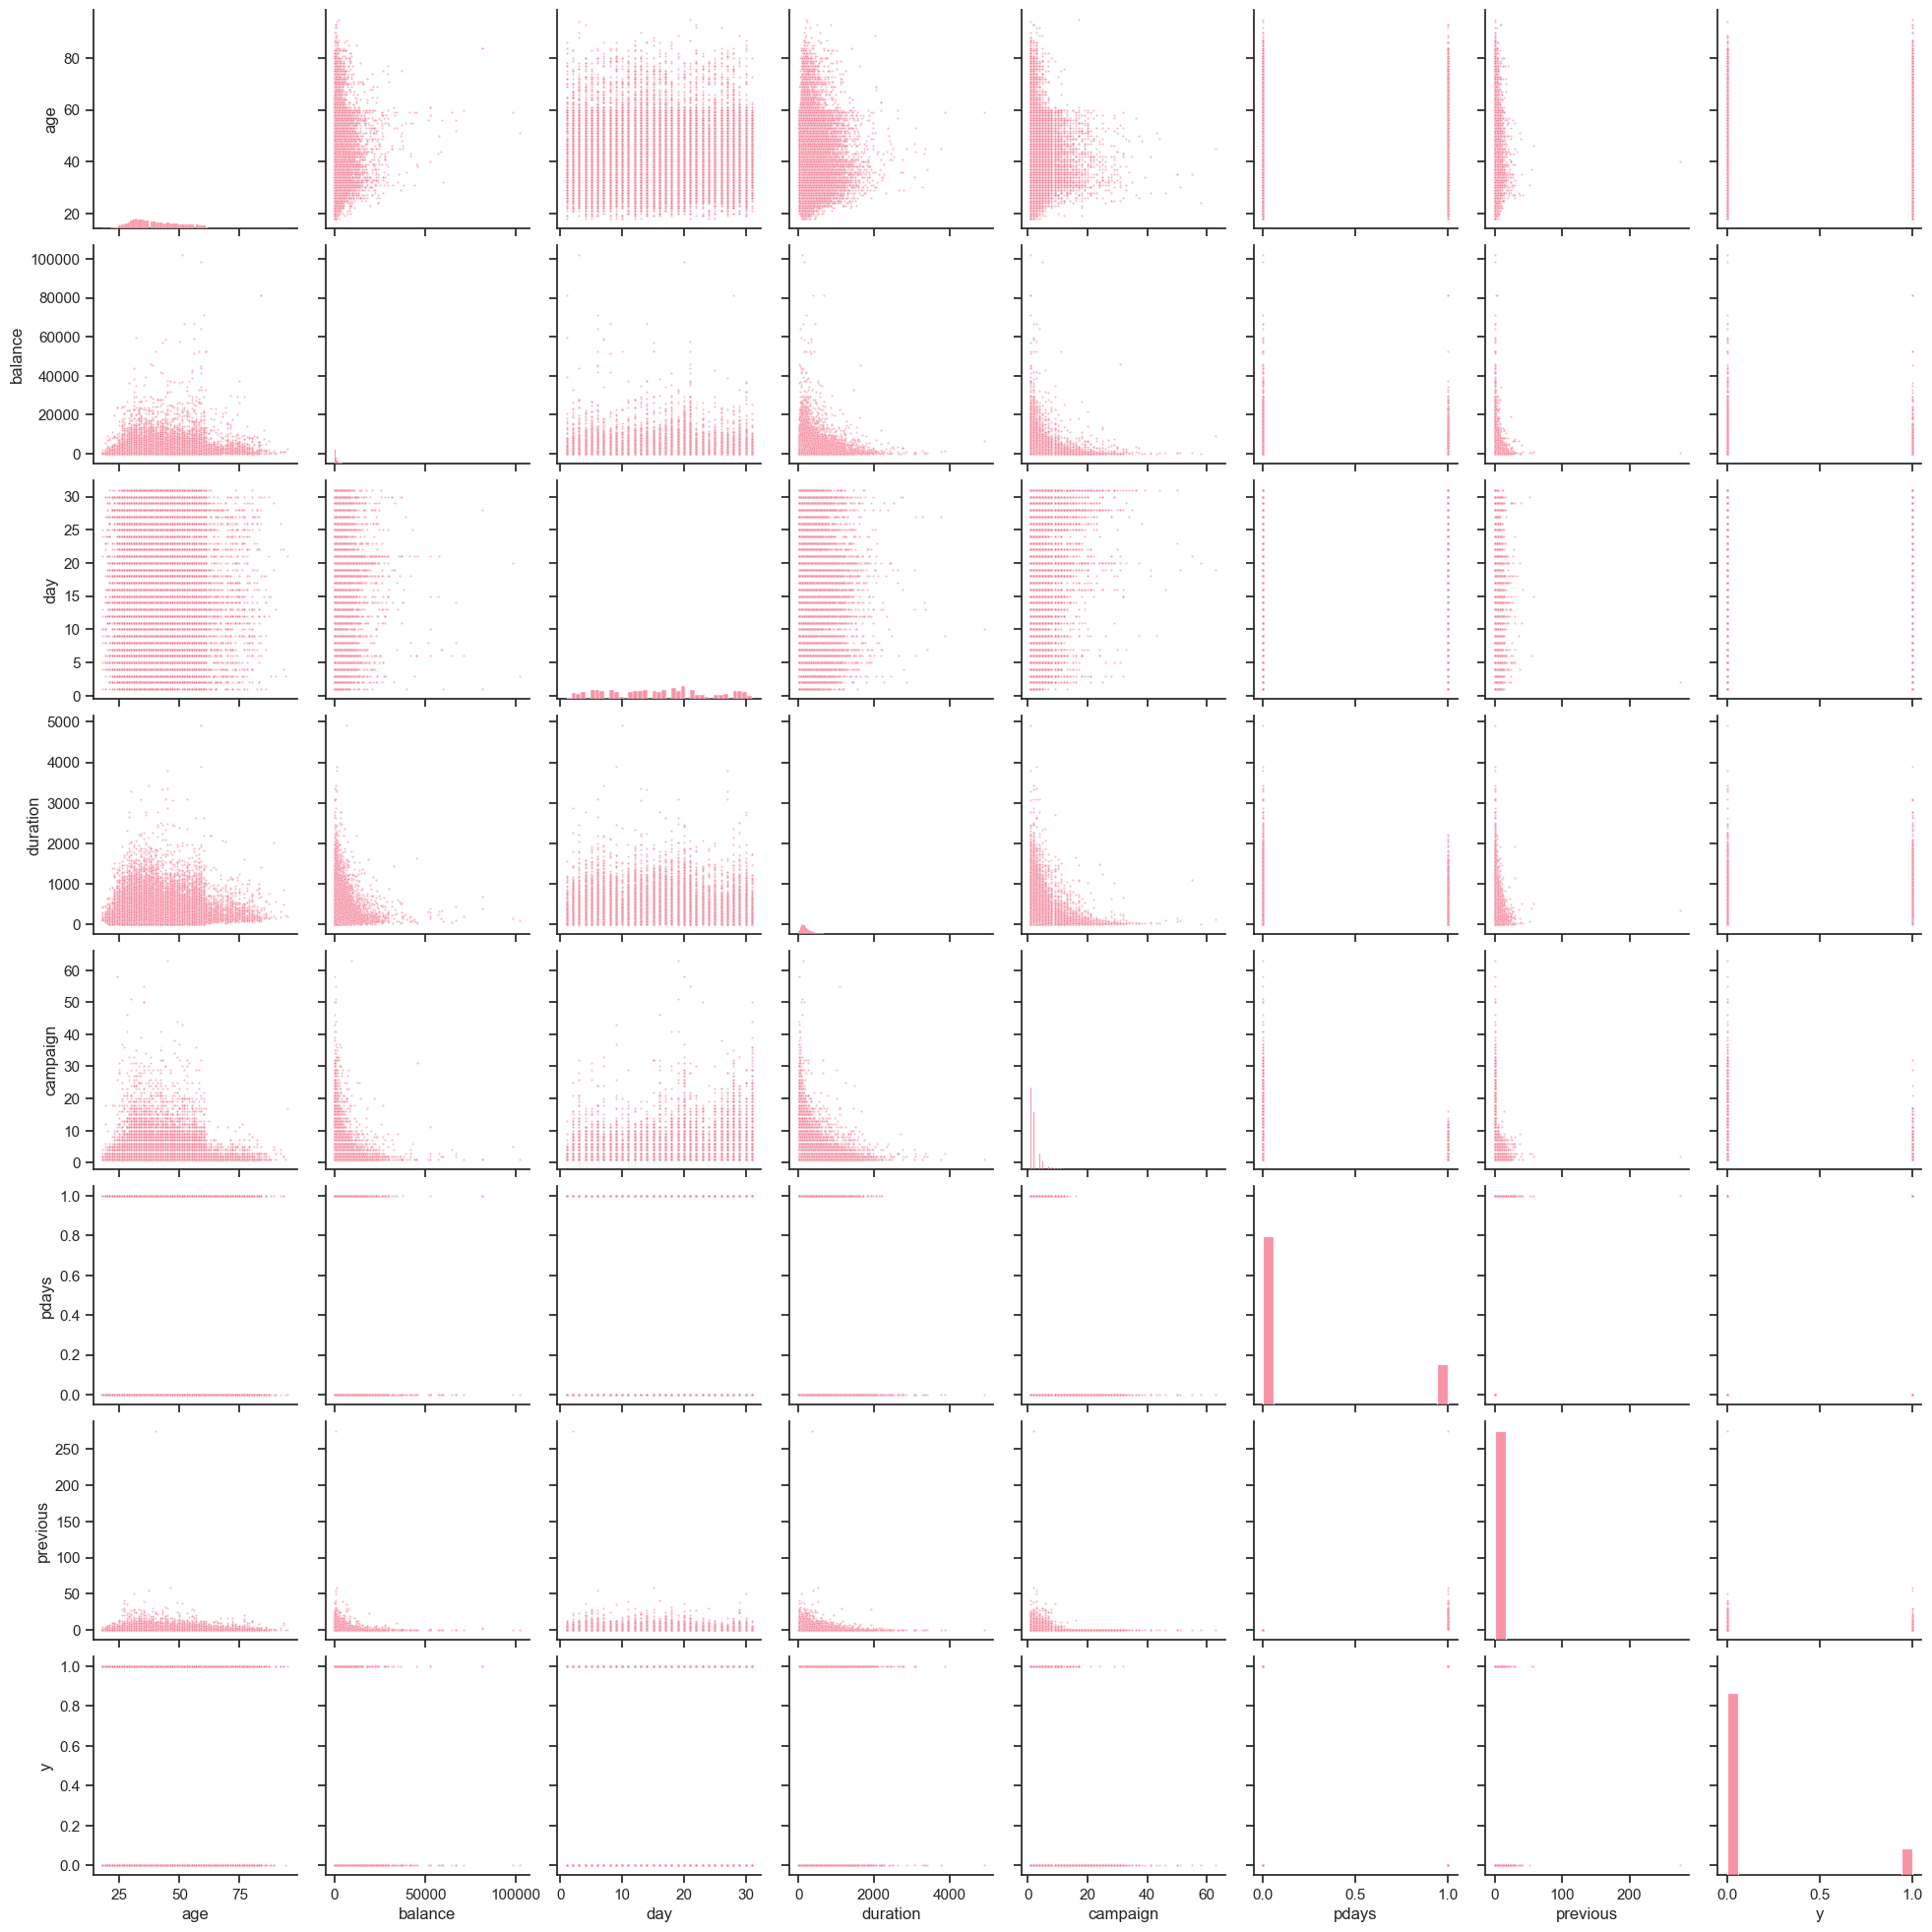

In [182]:
# Define your custom color palette
custom_palette = sns.color_palette("husl")  # You can choose any palette you like

# Set the style and palette
sns.set(style="ticks", palette=custom_palette)

# Increase marker size and decrease transparency
g = sns.pairplot(df, markers='.', plot_kws={'alpha': 0.5, 's': 10})

# Show the pair plot
plt.show()


In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,other,5,may,261,1,0,0,unknown,0
1,44,technician,single,2,no,29,yes,no,other,5,may,151,1,0,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,other,5,may,76,1,0,0,unknown,0
3,47,blue-collar,married,0,no,1506,yes,no,other,5,may,92,1,0,0,unknown,0
4,35,management,married,3,no,231,yes,no,other,5,may,139,1,0,0,unknown,0


In [26]:
# Dividing the data into test and Train : 70% of data as Test data

In [27]:
# Label Encode Categorical Features

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode categorical features
le_count = 0
for col in df.columns[:-1]: # Exclude the last column (assuming it's the target variable)
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

8 columns were label encoded.


In [28]:
# Prepare for X and y
y = df.y
X = df.drop('y',axis=1)
 

# Randomly split into training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70) 


## Use different Classifier to predict Accuracy of the model

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
from xgboost import XGBClassifier



# Initialize classifiers in consideration
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('Gaussian NB', GaussianNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy')),
    ('Bagging Classifier', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100)),
    ('XGBoost Classifier', XGBClassifier(objective='binary:logistic',learning_rate=0.5,max_depth=3,n_estimators=100))
]

# Evaluate Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    # accuracy scoring:
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['AUC Mean'], ascending=False)



,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
4,Random Forest,91.64,0.51,89.47,0.85
6,Gradient Boosting Classifier,91.32,0.51,89.57,1.07
7,XGBoost Classifier,91.20,0.67,89.13,0.74
5,Bagging Classifier,90.76,0.49,89.03,0.77
0,Logistic Regression,85.61,1.55,88.27,1.16
2,Gaussian NB,82.73,1.92,85.47,0.87
1,KNN,68.72,2.41,85.96,1.49
3,Decision Tree Classifier,68.29,1.44,85.70,0.77


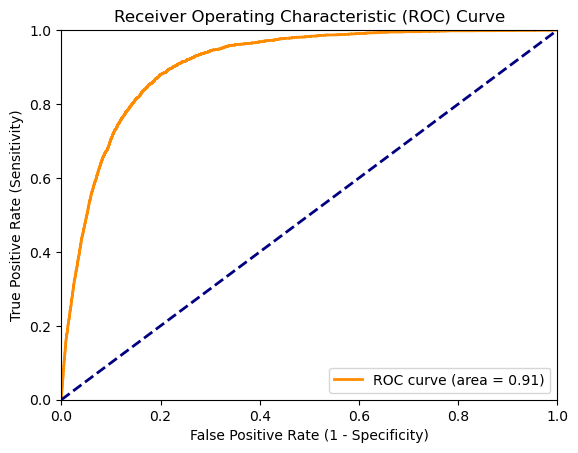

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

# Fit a Random Forest classifier
clf = XGBClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



An AUC-ROC value of 0.91 indicates that the model has good discriminatory power and is able to distinguish between the positive and negative classes quite effectively.

## Confusion Matrix

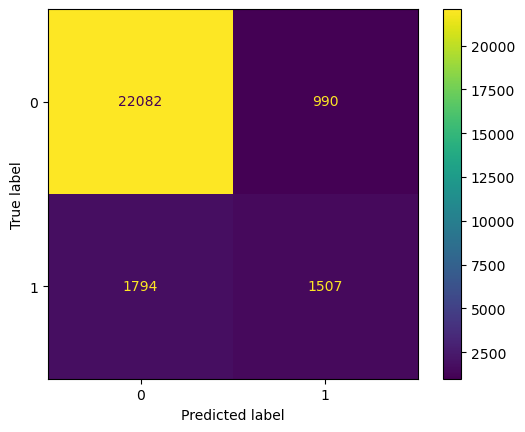

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have features X_train, X_test and labels y_train, y_test

# Initialize and train the Random Forest classifier
rf_model = XGBClassifier(learning_rate=0.5,max_depth=3,n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

disp.plot()
plt.show()

#True Positive (TP)= 1508, Correctly Predicting a term deposit, leading to a successful deposit.
False Positive (FP)= 1782, Incorrectly predicting a term deposit, manpower spent on marketing to a customer who does not actually deposit.
True Negative (TN): 22110, Correctly predicting no term deposit, avoiding unnecessary marketing expenses
False Negative (FN): 973, incorrectly predicts that a customer will not subscribe to the term deposit when, in fact, they do subscribe.


In [33]:
## Expected Value Framework
# Assumptions: LoanInterestRate = 6%
#Term dDeposit Rate = 3.2%

In [138]:
'''default = int(input("default: "))
if (default == 0):
    tp = float(input("True Positive: ")) 
    fp = float(input("False Positive: "))
    tn = float(input("True Negative: "))
    fn = float(input("False Negative: "))
    VYp = int(input("V(Y,p): "))
    VNp = int(input("V(N,p): "))
    VNn = int(input("V(N,n): "))
    VYn = int(input("V(Y,n): "))
else:
    tp = 70
    fp = 53
    tn = 2738
    fn = 278
    VYp = 99
    VNp = 0
    VNn = 0
    VYn = -1
'''

LoanInterestRate = 6
FixedDepositRate = 3.2
meanAmount = 2003.45

tp = 1508
fp = 1782
tn = 22110
fn = 973


total = tp + fp + tn + fn
TruePositiveRate = tp/(tp + fn)
FalsePositiveRate = fp/(fp + tn)
TrueNegativeRate = tn/(tn + fp)
FalseNegativeRate = fn/(fn + tp)

print("TruePositiveRate/Sensitivity: ", TruePositiveRate)
print("FalsePositiveRate/Fallout: ", FalsePositiveRate)
print("TrueNegativeRate/Specificity: ", TrueNegativeRate)
print("FalseNegativeRate/Miss: ", FalseNegativeRate)

accuracy = (tp + tn)/total
precision = tp/(tp + fp)
recall = tp/(tp + fn)
F1Score = 2 * precision * recall/(precision + recall)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1Score: ", F1Score)
Ppos = (tp + fn)/total # likelyhood of seeing a positive instance
Pneg = (tn + fp)/total # likelyhood of seeing a negative instance
print("P(positive): ", Ppos)
print("P(negative): ", Pneg)



TruePositiveRate/Sensitivity:  0.6078194276501411
FalsePositiveRate/Fallout:  0.07458563535911603
TrueNegativeRate/Specificity:  0.925414364640884
FalseNegativeRate/Miss:  0.3921805723498589
Accuracy:  0.8955371023395139
Precision:  0.4583586626139818
Recall:  0.6078194276501411
F1Score:  0.5226130653266331
P(positive):  0.09407348424525082
P(negative):  0.9059265157547491


# Exptected value Frame work

In [142]:
#assumption of 35%
c = 0
for x in y_pred:
    if x == 1:
        c += 1

arr = []
bal=[]
for t in X_test['balance']:
    bal.append(t)
for x in y_test:
    arr.append(x)
    
truePos = 0
trueNeg = 0
falsPos = 0
falsNeg = 0
prof = 0
i = 0
while i < 26372:
    if y_pred[i] == 1 and arr[i] == 1:
        truePos += 1
        prof = bal[i]*0.35*(2.8) + (prof - 1)# assumption of 35%
    elif y_pred[i] == 1 and arr[i] == 0:
        falsPos += 1
        prof = prof - 1
    elif y_pred[i] == 0 and arr[i] == 1:
        falsNeg += 1
    elif y_pred[i] == 0 and arr[i] == 0:
        trueNeg += 1
    i += 1
meanprof = prof/c
print("Total Net Profit incurred by the bank using the model : ",prof)
print("Mean profit(individual profit average) incurred by the bank : ", meanprof)
print("False Negative: ", falsNeg)
print("False Positive: ", falsPos)
print("True Negative: ", trueNeg)
print("True Positive: ", truePos)


Total Net Profit incurred by the bank using the model :  3014260.519999995
Mean profit(individual profit average) incurred by the bank :  1207.1527913496175
False Negative:  1793
False Positive:  990
True Negative:  22082
True Positive:  1507


##  Analysis of 'balance' and Target variable 'y'(Term deposit)

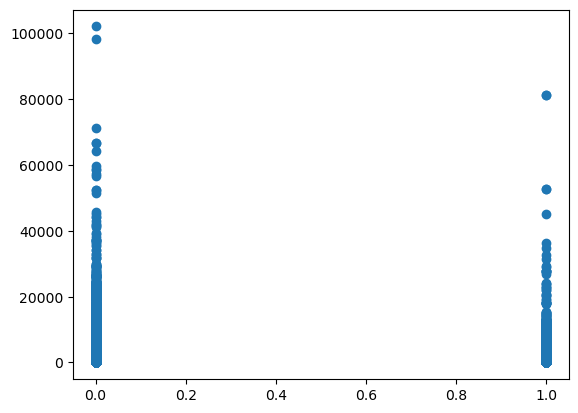

In [35]:
# Scatterplot balance vs y
plt.scatter(df['y'], df['balance'])

# K means between 'balance' and 'y'

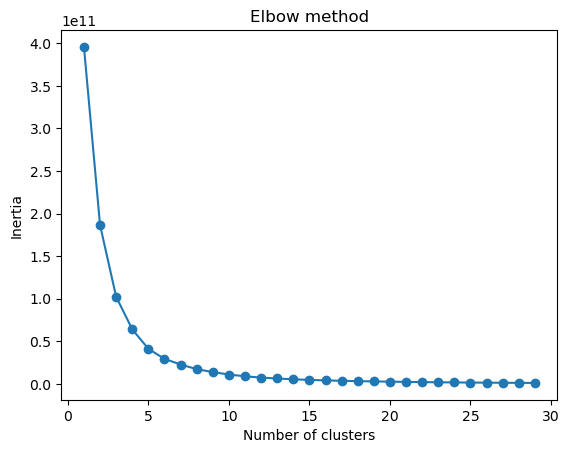

In [36]:
xcord = df['balance']
ycord = df['y']
data = list(zip(xcord,ycord))
inertias = []

for i in range(1,30):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,30), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From above figure elbow method we found that the curve is flattening at 7. Hence, We have choosen a cluster size of 7 for our Analysis

In [37]:
# Clusters represented by differnt Clusters 0-7 by different colors.

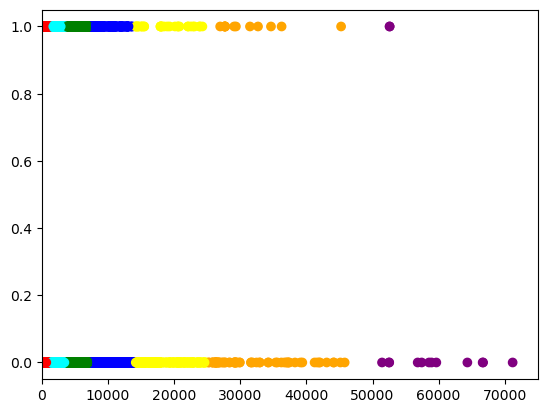

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



kmeans = KMeans(n_clusters=7)
kmeans.fit(data)

# Define custom colors for clusters
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan']

# Plot the scatter plot with custom colors for clusters
plt.scatter(xcord, ycord, c=[colors[label] for label in kmeans.labels_])
plt.xlim(0, 75000)
plt.show()

#CLustering of 'balance'

In [39]:
from collections import Counter

# Assuming kmeans.labels_ contains the cluster labels assigned by k-means
cluster_counts = Counter(kmeans.labels_)


for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data points")


Cluster 6: 7739 data points
Cluster 0: 25439 data points
Cluster 1: 1101 data points
Cluster 2: 3012 data points
Cluster 5: 287 data points
Cluster 3: 79 data points
Cluster 4: 18 data points


In [40]:
# Maximum and Minimum Balance in each cluster

In [41]:
# Combine cluster labels
df['Cluster'] = kmeans.labels_


for cluster in df['Cluster'].unique():
    # Filter data points belonging to the current cluster
    cluster_data = df[df['Cluster'] == cluster]
    
    # Calculate maximum and minimum balance values for the current cluster
    max_balance = cluster_data['balance'].max()
    min_balance = cluster_data['balance'].min()

    
    # Print maximum and minimum balance values for the current cluster

    print(f"Cluster {cluster}: Max balance = {max_balance}, Min balance = {min_balance}")

Cluster 6: Max balance = 3568, Min balance = 1285
Cluster 0: Max balance = 1284, Min balance = 1
Cluster 1: Max balance = 14058, Min balance = 7372
Cluster 2: Max balance = 7369, Min balance = 3570
Cluster 5: Max balance = 24870, Min balance = 14093
Cluster 3: Max balance = 45789, Min balance = 25204
Cluster 4: Max balance = 102127, Min balance = 51439


In [42]:
# Term Deposit yes or no subscription according to Cluster

In [43]:
x = 0
while x < 7:
    target_cluster = x

    # Initialize counters
    count_y0 = 0
    count_y1 = 0

    # Iterate over rows of the DataFrame
    for index, row in df.iterrows():
        if row['Cluster'] == x:
            if row['y'] == 0:
                count_y0 += 1
            elif row['y'] == 1:
                count_y1 += 1

    print(f"Number of data points in cluster {target_cluster} with y-coordinate 0: {count_y0}")
    print(f"Number of data points in cluster {target_cluster} with y-coordinate 1: {count_y1}")

    x += 1
    print('\n')

    

Number of data points in cluster 0 with y-coordinate 0: 22619
Number of data points in cluster 0 with y-coordinate 1: 2820


Number of data points in cluster 1 with y-coordinate 0: 919
Number of data points in cluster 1 with y-coordinate 1: 182


Number of data points in cluster 2 with y-coordinate 0: 2519
Number of data points in cluster 2 with y-coordinate 1: 493


Number of data points in cluster 3 with y-coordinate 0: 66
Number of data points in cluster 3 with y-coordinate 1: 13


Number of data points in cluster 4 with y-coordinate 0: 14
Number of data points in cluster 4 with y-coordinate 1: 4


Number of data points in cluster 5 with y-coordinate 0: 255
Number of data points in cluster 5 with y-coordinate 1: 32


Number of data points in cluster 6 with y-coordinate 0: 6526
Number of data points in cluster 6 with y-coordinate 1: 1213




In [44]:
# Label Encode Categorical Features

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode categorical features
le_count = 0
for col in df.columns[:-1]: # Exclude the last column (assuming it's the target variable)
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


# The above code list term deposits subscription from the cluster.Here, we can see that from a particular cluster how many have opted for Term deposit and how many are nottaking the term deposit.

In [46]:
c = 0
for t in df['y']:
    if(t == 1):
        c = c + 1 
c

4757

In [47]:
# Calculating mean balance of people who term deposited their money 
summ = 0
count = 0
for index, row in df.iterrows():
    if row['balance'] > 0 and row['y'] == 1:
        summ = summ + row['balance']
        count = count + 1
        
mean = summ/count
print(count)
print(mean)

4757
2003.459953752365


In [132]:

c = 0
for x in y_pred:
    if x == 1:
        c += 1


Total profit :  3014260.519999995
Mean profit:  1207.1527913496175
False Negative:  1793
False Positive:  990
True Negative:  22082
True Positive:  1507


In [122]:
bal=[]
for t in X_test['balance']:
    bal.append(t)
print(X_test['balance'])

15898      89
36497     607
18889     202
13754    3571
29574      53
         ... 
3477      680
33184     156
5159      783
12447     303
41579     766
Name: balance, Length: 26373, dtype: int64
